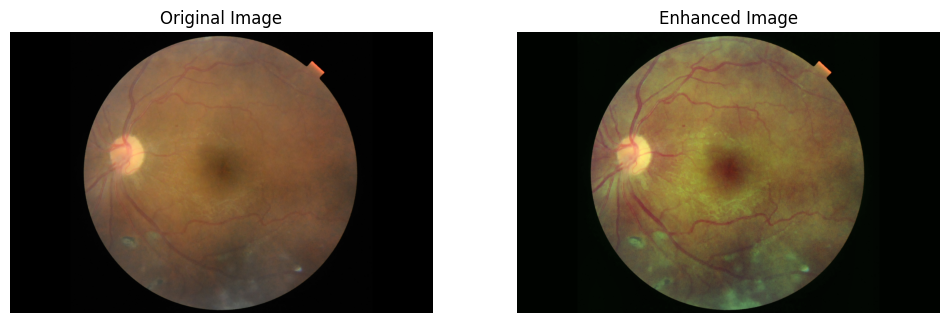

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_retinal_image(image_path):
    # Step 1: Read the RGB image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Step 2: Split the image into R, G, B channels
    R, G, B = cv2.split(img)

    # Step 3: Apply CLAHE to the G channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_G = clahe.apply(G)

    # Step 4: Merge the channels back
    enhanced_img = cv2.merge((R, enhanced_G, B))

    # Display the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Enhanced Image')
    plt.imshow(enhanced_img)
    plt.axis('off')

    plt.show()

# Example usage
image_path =r"C:\Users\thooy\Downloads\Evaluation_Set\Evaluation_Set\Validation\93.png" # Update this path
enhance_retinal_image(image_path)


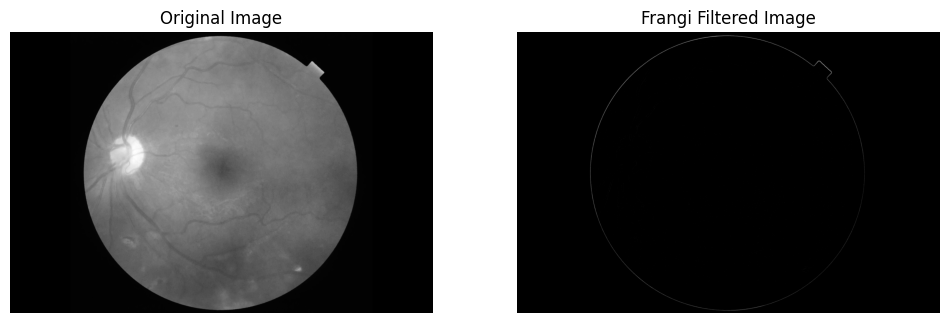

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, color

# Load an example image (you can replace this with your image)
image = io.imread( r"C:\Users\thooy\Downloads\Evaluation_Set\Evaluation_Set\Validation\93.png" )
gray_image = color.rgb2gray(image)  # Convert to grayscale

# Apply the Frangi filter
frangi_image = filters.frangi(gray_image)

# Display the original and the filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Frangi Filtered Image')
plt.imshow(frangi_image, cmap='gray')
plt.axis('off')

plt.show()


In [1]:
import cv2
import numpy as np

def enhance_and_extract_edges(image_path):
    # Step 1: Read the RGB image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found or unable to read: {image_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Step 2: Split the image into R, G, B channels
    R, G, B = cv2.split(img)

    # Step 3: Apply CLAHE to the G channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
    enhanced_G = clahe.apply(G)

    # Step 4: Apply Canny Edge Detection to the enhanced green channel
    edges = cv2.Canny(enhanced_G, 80, 150)

    # Step 5: Morphological operations to connect the edges
    kernel = np.ones((3, 3), np.uint8)  # Define a kernel f or morphological operations
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)  # Dilation
    connected_edges = cv2.morphologyEx(dilated_edges, cv2.MORPH_CLOSE, kernel)  # Closing

    # Step 6: Create a colored edge mask
    edge_colored = np.zeros_like(img)  # Create an empty image with the same shape as the original
    edge_colored[connected_edges > 0] = [255, 0, 0]  # Color the edges in red

    # Step 7: Overlay the edge mask on the enhanced RGB image
    overlay = cv2.addWeighted(img, 0.7, edge_colored, 0.3, 0)

    return enhanced_G, edges, connected_edges, overlay

# Example usage:
try:
    enhanced_img, vessels_edges, connected_edges, overlay_img = enhance_and_extract_edges( r"C:\Users\thooy\Downloads\Evaluation_Set\Evaluation_Set\Validation\93.png" )

    # Display the images
    cv2.imshow('Enhanced Green Channel', enhanced_img)
    cv2.imshow('Original Vessel Edges', vessels_edges)
    cv2.imshow('Connected Vessel Edges', connected_edges * 255)  # Multiply by 255 to display properly
    cv2.imshow('Overlayed Edges on Enhanced Image', overlay_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
except ValueError as e:
    print(e)


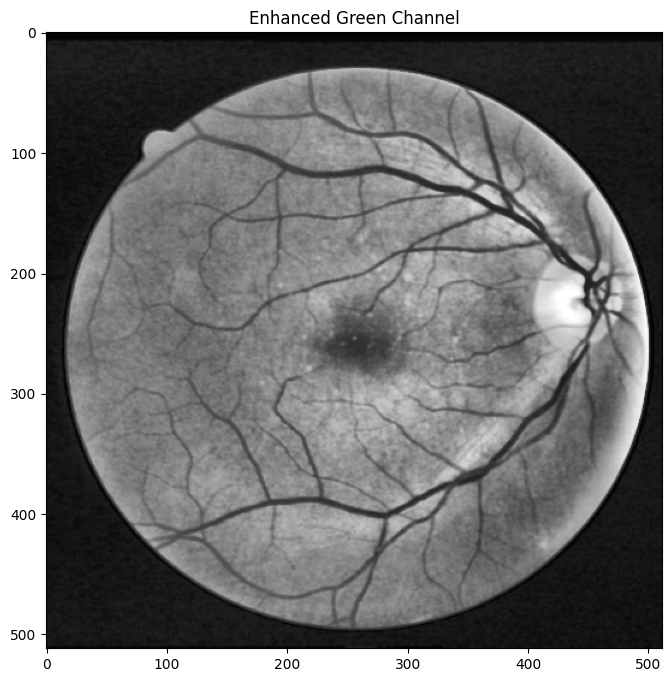

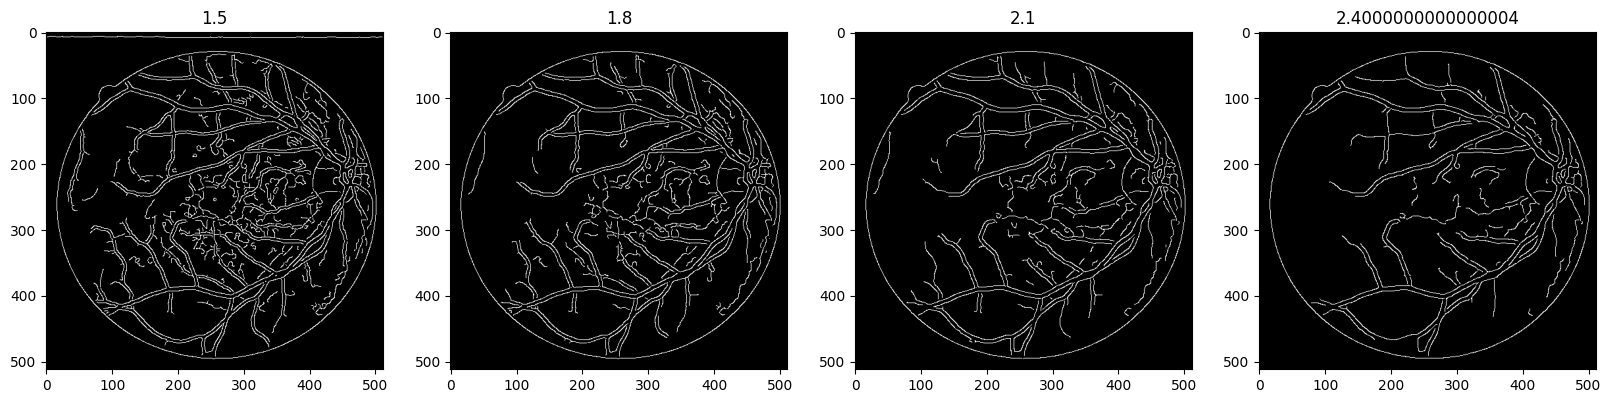

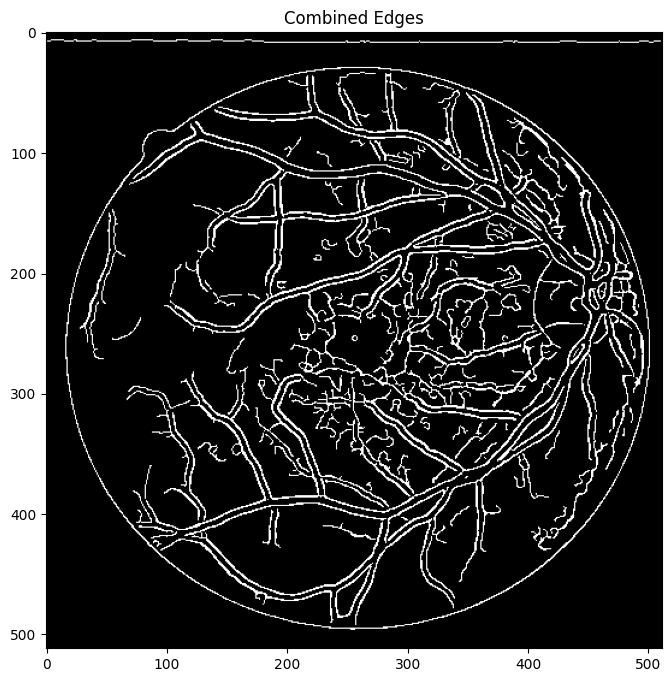

In [71]:
import cv2
import numpy as np
import skimage.feature as skf
from skimage import exposure, img_as_ubyte
import matplotlib.pyplot as plt

# Load the retinal image (replace with the correct path to your image)
image = cv2.imread(r"C:\Users\thooy\Downloads\Evaluation_Set\1.png")

# Convert to grayscale (G channel for retinal vessel extraction)
green_channel = image[:,:,1]

# Apply CLAHE to enhance the green channel
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
enhanced_green=cv2.GaussianBlur(green_channel, (3, 3), 0)
enhanced_green = clahe.apply(enhanced_green)


# Plot the enhanced image
plt.figure(figsize=(8, 8))
plt.title('Enhanced Green Channel')
plt.imshow(enhanced_green, cmap='gray')
plt.show()

# Multiscale Canny edge detection (varying sigma values)
sigmas = np.arange(1.5, 2.5, 0.3)
edge_maps = []

# Apply Canny edge detection for different sigma values
for sigma in sigmas:
    edges = skf.canny(enhanced_green, sigma=sigma)
    edge_maps.append(edges)

# Plot the edge maps for different sigmas
fig, axes = plt.subplots(1, len(sigmas), figsize=(20, 5))
for i, (sigma, edge_map) in enumerate(zip(sigmas, edge_maps)):
    axes[i].imshow(edge_map, cmap='gray')
    axes[i].set_title(sigma)
plt.show()

# Combining edges from different scales (optional)
# Here we take a logical OR of the edge maps to combine information across scales
combined_edges = np.zeros_like(edge_maps[0], dtype=bool)
for edge_map in edge_maps:
    combined_edges = np.logical_or(combined_edges, edge_map)

#combined_edges=np.logical_and(edge_maps[1],edge_maps[0])
# Display the combined edge map
plt.figure(figsize=(8, 8))
plt.title('Combined Edges')
plt.imshow(combined_edges, cmap='gray')
plt.show()

# At this point, you can further refine the edges or integrate this step with vessel centerline detection.


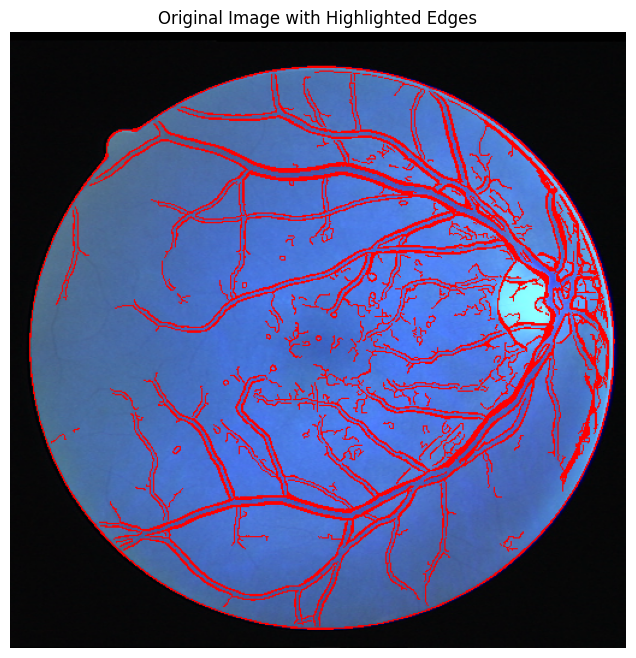

In [4]:
import cv2
import numpy as np
import skimage.feature as skf
from skimage import exposure, img_as_ubyte
import matplotlib.pyplot as plt

# Load the retinal image (replace with the correct path to your image)
image = cv2.imread(r"C:\Users\thooy\Downloads\Evaluation_Set\1.png")

# Convert to grayscale (G channel for retinal vessel extraction)
green_channel = image[:,:,1]

# Apply CLAHE to enhance the green channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_green = clahe.apply(green_channel)

# Multiscale Canny edge detection (varying sigma values)
sigmas = np.arange(1, 6, 0.5)
edge_maps = []

# Apply Canny edge detection for different sigma values
for sigma in sigmas:
    edges = skf.canny(enhanced_green, sigma=sigma)
    edge_maps.append(edges)

# Combining edges from different scales (logical OR of the edge maps)
combined_edges = np.zeros_like(edge_maps[0], dtype=bool)
for edge_map in edge_maps:
    combined_edges = np.logical_or(combined_edges, edge_map)

# Highlighting edges on the original image
# Convert the edge map to uint8 to overlay on the image
edges_uint8 = (combined_edges * 255).astype(np.uint8)

# Create a color overlay by converting the original image to RGB
overlay_image = image

# Highlight the edges in red (or any color) on the original image
# Using the red channel for highlighting
overlay_image[edges_uint8 != 0] = [255, 0, 0]  # Set red color where edges are detected

# Display the original image with highlighted edges
plt.figure(figsize=(8, 8))
plt.title('Original Image with Highlighted Edges')
plt.imshow(overlay_image)
plt.axis('off')
plt.show()


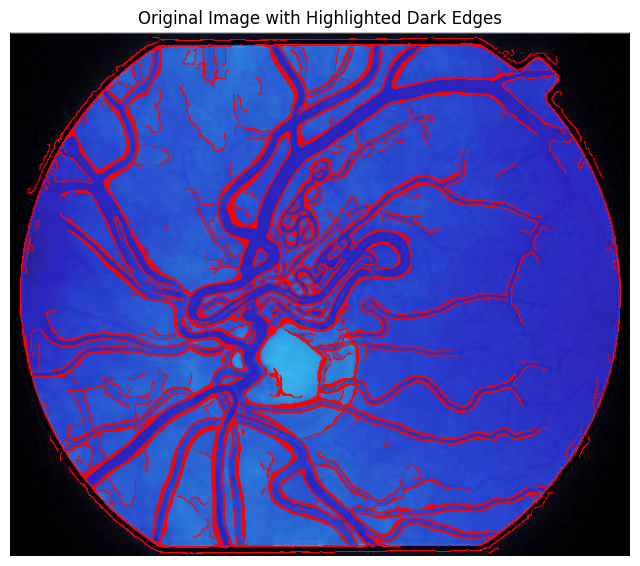

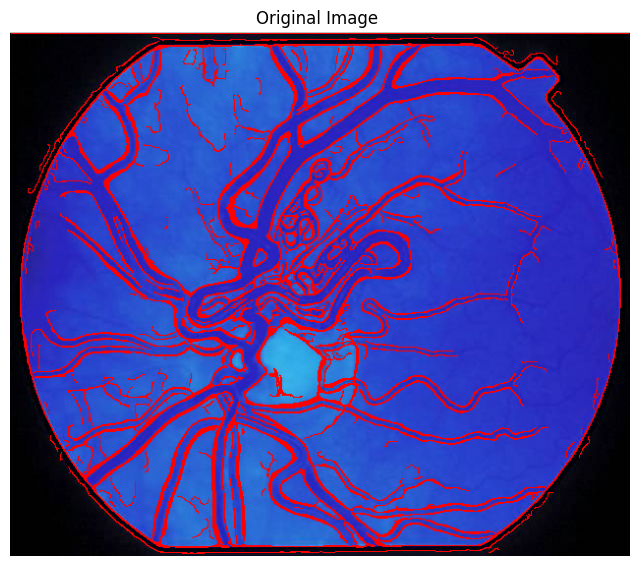

In [59]:
import cv2
import numpy as np
import skimage.feature as skf
from skimage import exposure, img_as_ubyte
import matplotlib.pyplot as plt

# Load the retinal image (replace with the correct path to your image)
image = cv2.imread(r"C:\Users\thooy\Downloads\Evaluation_Set\tileshop.jpeg")

# Convert to grayscale (G channel for retinal vessel extraction)
green_channel = image[:, :, 1]

# Apply CLAHE to enhance the green channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_green = clahe.apply(green_channel)

# Multiscale Canny edge detection (varying sigma values)
sigmas = np.arange(1.3, 6, 0.3)
edge_maps = []

# Apply Canny edge detection for different sigma values
for sigma in sigmas:
    edges = skf.canny(enhanced_green, sigma=sigma)
    edge_maps.append(edges)

# Combine edges from different scales (logical OR of the edge maps)
combined_edges = np.zeros_like(edge_maps[0], dtype=bool)
for edge_map in edge_maps:
    combined_edges = np.logical_or(combined_edges, edge_map)

# Convert the combined edge map to uint8 for further processing
edges_uint8 = (combined_edges * 255).astype(np.uint8)

# Apply a threshold to focus on stronger (darker) edges
# The threshold value determines how "strong" an edge must be to be retained
threshold_value = 100  # You can adjust this value based on the result
_, thresholded_edges = cv2.threshold(edges_uint8, threshold_value, 255, cv2.THRESH_BINARY)

# Highlighting the dark edges on the original image
overlay_image = image

# Highlight the edges in red (or any color) on the original image
overlay_image[thresholded_edges != 0] = [255, 0, 0]  # Red color for detected dark edges

# Display the original image with highlighted dark edges
plt.figure(figsize=(8, 8))
plt.title('Original Image with Highlighted Dark Edges')
plt.imshow(overlay_image)
plt.axis('off')
plt.show()
plt.figure(figsize=(8, 8))
plt.title('Original Image ')
plt.imshow(image)
plt.axis('off')
plt.show()


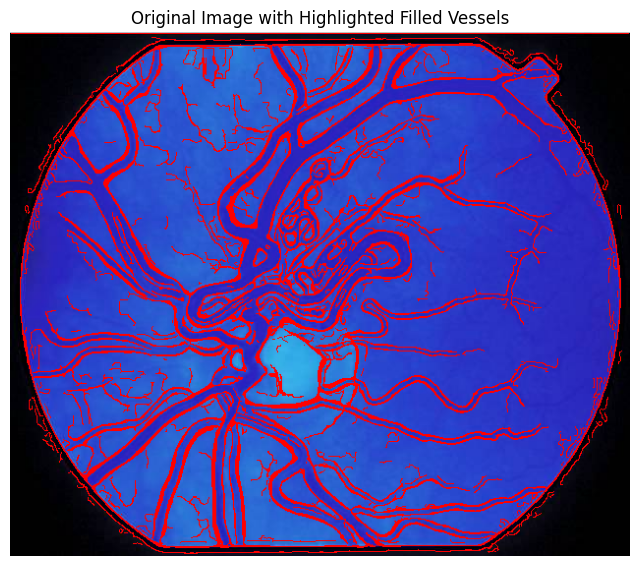

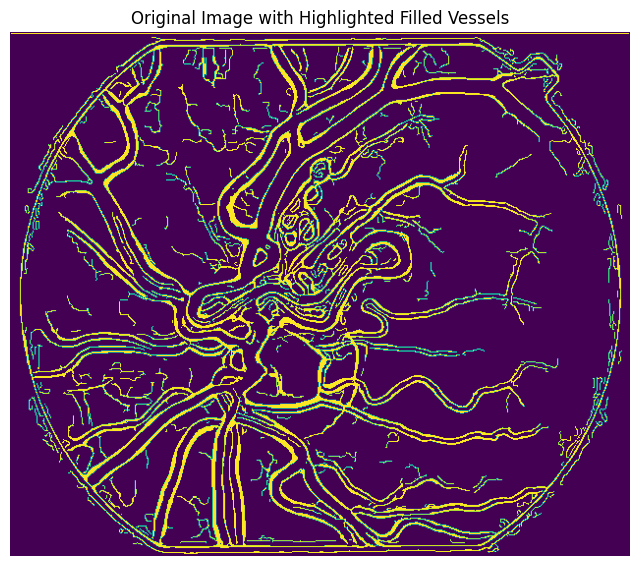

In [50]:
# Convert the image to grayscale (using the green channel)
gray_image = green_channel.copy()

# Apply a binary mask based on edge detection to guide flood filling
mask = np.zeros((gray_image.shape[0] + 2, gray_image.shape[1] + 2), np.uint8)  # Mask for floodFill (2 pixels larger)

# Thresholded edges will serve as vessel boundaries
flood_fill_image = edges_uint8.copy()  # Create a copy of the edge map

# Loop over all pixels in the image
for y in range(flood_fill_image.shape[0]):
    for x in range(flood_fill_image.shape[1]):
        if thresholded_edges[y, x] == 255:  # Consider only edge points as boundaries
            # Use flood fill with a low threshold (intensity-based fill)
            cv2.floodFill(flood_fill_image, mask, (x, y), 255, loDiff=(20,), upDiff=(20,))

# Combine the filled vessels with the original edges
filled_vessels = np.maximum(flood_fill_image, edges_uint8)

# Highlight the filled vessels on the original image in red
overlay_filled_vessels = image.copy()
overlay_filled_vessels[filled_vessels != 0] = [255, 0, 0]  # Red for filled vessels

# Display the result with filled vessels highlighted
plt.figure(figsize=(8, 8))
plt.title('Original Image with Highlighted Filled Vessels')
plt.imshow(overlay_filled_vessels)
plt.axis('off')
plt.show()
plt.figure(figsize=(8, 8))
plt.title('Original Image with Highlighted Filled Vessels')
plt.imshow(filled_vessels)
plt.axis('off')
plt.show()

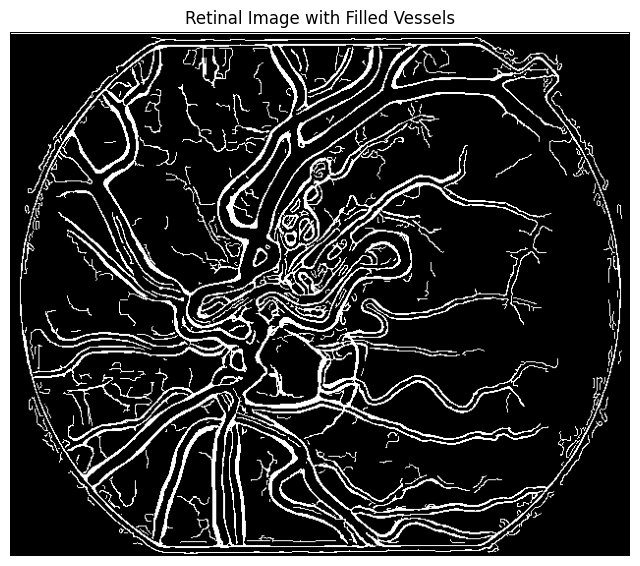

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the retinal image


# Threshold the image to create a binary mask
# (Assuming the vessels are the brighter areas in the image)
_, binary_mask = cv2.threshold(filled_vessels, 50, 255, cv2.THRESH_BINARY)

# Create a mask for flood fill (make sure it's 2 pixels larger than the image)
flood_fill_mask = np.zeros((binary_mask.shape[0] + 2, binary_mask.shape[1] + 2), np.uint8)

# Flood fill operation to fill the inside of the vessels
# Use the binary mask to specify the regions to fill
flood_filled_image = binary_mask.copy()

# Flood fill operation starting from vessel edges
for y in range(binary_mask.shape[0]):
    for x in range(binary_mask.shape[1]):
        if binary_mask[y, x] == 255:  # Only consider vessel boundary pixels
            cv2.floodFill(flood_filled_image, flood_fill_mask, (x, y), 255, loDiff=10, upDiff=10)

# Display the result
plt.figure(figsize=(8, 8))
plt.title('Retinal Image with Filled Vessels')
plt.imshow(flood_filled_image, cmap='gray')
plt.axis('off')
plt.show()


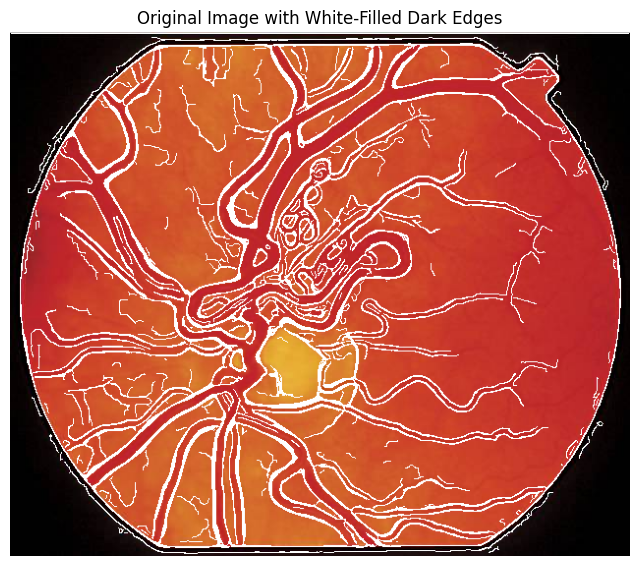

In [53]:
import cv2
import numpy as np
import skimage.feature as skf
from skimage import exposure, img_as_ubyte
import matplotlib.pyplot as plt

# Load the retinal image (replace with the correct path to your image)
image = cv2.imread(r"C:\Users\thooy\Downloads\Evaluation_Set\tileshop.jpeg")

# Convert to grayscale (G channel for retinal vessel extraction)
green_channel = image[:, :, 1]

# Apply CLAHE to enhance the green channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_green = clahe.apply(green_channel)

# Multiscale Canny edge detection (varying sigma values)
sigmas = np.arange(1.2, 6, 0.5)
edge_maps = []

# Apply Canny edge detection for different sigma values
for sigma in sigmas:
    edges = skf.canny(enhanced_green, sigma=sigma)
    edge_maps.append(edges)

# Combine edges from different scales (logical OR of the edge maps)
combined_edges = np.zeros_like(edge_maps[0], dtype=bool)
for edge_map in edge_maps:
    combined_edges = np.logical_or(combined_edges, edge_map)

# Convert the combined edge map to uint8 for further processing
edges_uint8 = (combined_edges * 255).astype(np.uint8)

# Apply a threshold to focus on stronger (darker) edges
# The threshold value determines how "strong" an edge must be to be retained
threshold_value = 100  # You can adjust this value based on the result
_, thresholded_edges = cv2.threshold(edges_uint8, threshold_value, 255, cv2.THRESH_BINARY)

# Highlighting the dark edges by filling them with white on the original image
overlay_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Fill the detected edges in white (255, 255, 255 for white color)
overlay_image[thresholded_edges != 0] = [255, 255, 255]  # Fill detected dark edges with white

# Display the original image with filled white edges
plt.figure(figsize=(8, 8))
plt.title('Original Image with White-Filled Dark Edges')
plt.imshow(overlay_image)
plt.axis('off')
plt.show()


In [7]:
import cv2
import numpy as np

def enhance_retinal_image(image_path):
    # Step 1: Read the RGB image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found or unable to read: {image_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Step 2: Split the image into R, G, B channels
    R, G, B = cv2.split(img)

    # Display the original Green channel
    cv2.imshow('Original Green Channel', G)
    
    # Step 3: Apply CLAHE to the G channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_G = clahe.apply(G)

    # Step 4: Apply Canny Edge Detection to the enhanced green channel
    edges = cv2.Canny(enhanced_G, 100, 200)

    return enhanced_G, edges

# Example usage:
try:
    enhanced_img, vessels_edges = enhance_retinal_image( r"C:\Users\thooy\Downloads\Evaluation_Set\Evaluation_Set\Validation\93.png" )

    # Display the enhanced Green channel and the edges
    #cv2.imshow('Enhanced Green Channel', enhanced_img)
    #cv2.imshow('Vessel Edges', vessels_edges)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
except ValueError as e:
    print(e)


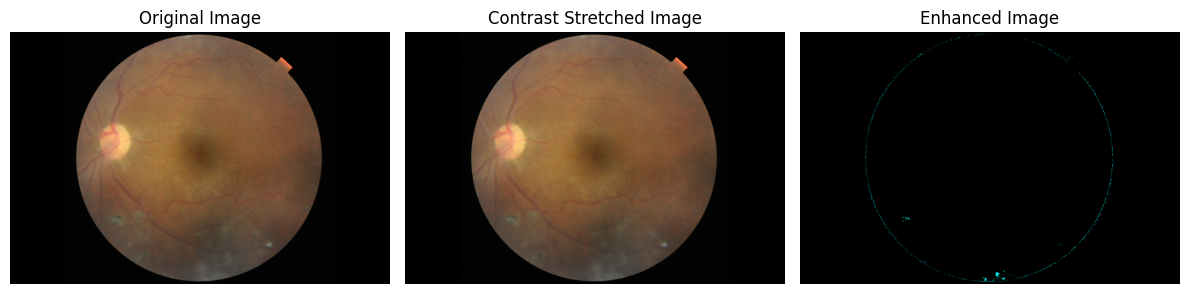

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrast_stretching(image, a=0, b=255):
    """Apply contrast stretching to an image."""
    img_float = image.astype(float)
    
    c = np.min(img_float)
    d = np.max(img_float)
    
    stretched = (img_float - c) * (b - a) / (d - c) + a
    
    return np.clip(stretched, 0, 255).astype(np.uint8)

def rgb_to_hsi(image):
    """Convert RGB image to HSI."""
    img = image.astype(float) / 255.0
    R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    
    I = (R + G + B) / 3.0
    
    min_RGB = np.minimum(np.minimum(R, G), B)
    S = 1 - (min_RGB / (I + 1e-10))
    
    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G) ** 2 + (R - B) * (G - B) + 1e-10)
    theta = np.arccos(num / (den + 1e-10))
    
    H = np.zeros_like(I)
    H[B <= G] = theta[B <= G]
    H[B > G] = 2 * np.pi - theta[B > G]
    H = H / (2 * np.pi)
    
    return np.dstack((H, S, I))

def hsi_to_rgb(hsi):
    """Convert HSI image back to RGB."""
    H, S, I = hsi[:, :, 0], hsi[:, :, 1], hsi[:, :, 2]
    
    R, G, B = np.zeros_like(I), np.zeros_like(I), np.zeros_like(I)

    # Calculate RGB values based on HSI components using numpy's logical operations
    R[(H < 1/3)] = I[(H < 1/3)] * (1 + S[(H < 1/3)] * np.cos(2 * np.pi * H[(H < 1/3)]) / np.cos(np.pi * H[(H < 1/3)]))
    G[(H < 1/3)] = I[(H < 1/3)] * (1 - S[(H < 1/3)])
    B[(H < 1/3)] = I[(H < 1/3)] * (1 - S[(H < 1/3)] * (1 - np.cos(2 * np.pi * H[(H < 1/3)]) / np.cos(np.pi * H[(H < 1/3)])))

    R[(H >= 1/3) & (H < 2/3)] = I[(H >= 1/3) & (H < 2/3)] * (1 - S[(H >= 1/3) & (H < 2/3)] * (1 - np.cos(2 * np.pi * H[(H >= 1/3) & (H < 2/3)]) / np.cos(np.pi * H[(H >= 1/3) & (H < 2/3)])))
    G[(H >= 1/3) & (H < 2/3)] = I[(H >= 1/3) & (H < 2/3)] * (1 + S[(H >= 1/3) & (H < 2/3)] * np.cos(2 * np.pi * H[(H >= 1/3) & (H < 2/3)]) / np.cos(np.pi * H[(H >= 1/3) & (H < 2/3)]))
    B[(H >= 1/3) & (H < 2/3)] = I[(H >= 1/3) & (H < 2/3)] * (1 - S[(H >= 1/3) & (H < 2/3)])

    R[(H >= 2/3)] = I[(H >= 2/3)] * (1 - S[(H >= 2/3)])
    G[(H >= 2/3)] = I[(H >= 2/3)] * (1 - S[(H >= 2/3)] * (1 - np.cos(2 * np.pi * H[(H >= 2/3)]) / np.cos(np.pi * H[(H >= 2/3)])))
    B[(H >= 2/3)] = I[(H >= 2/3)] * (1 + S[(H >= 2/3)] * np.cos(2 * np.pi * H[(H >= 2/3)]) / np.cos(np.pi * H[(H >= 2/3)]))

    return np.dstack((R, G, B))

def enhance_image(image_path):
    """Enhance underwater image using contrast stretching and HSI transformation."""
    image = cv2.imread(image_path)
    
    contrast_stretched = contrast_stretching(image)
    
    hsi_image = rgb_to_hsi(contrast_stretched)
    
    hsi_image[:, :, 1] = contrast_stretching(hsi_image[:, :, 1] * 255) / 255  # Stretch Saturation
    hsi_image[:, :, 2] = contrast_stretching(hsi_image[:, :, 2] * 255) / 255  # Stretch Intensity
    
    enhanced_image = hsi_to_rgb(hsi_image)
    
    return contrast_stretched, enhanced_image

# Path to the underwater image
image_path =r"C:\Users\thooy\Downloads\Evaluation_Set\Evaluation_Set\Validation\93.png"

# Enhance the image
contrast_stretched_image, enhanced_image = enhance_image(image_path)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Contrast Stretched Image")
plt.imshow(cv2.cvtColor(contrast_stretched_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Enhanced Image")
plt.imshow(cv2.cvtColor(enhanced_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


In [8]:
image = cv2.imread(r"C:\Users\thooy\Downloads\Evaluation_Set\tileshop.jpeg")


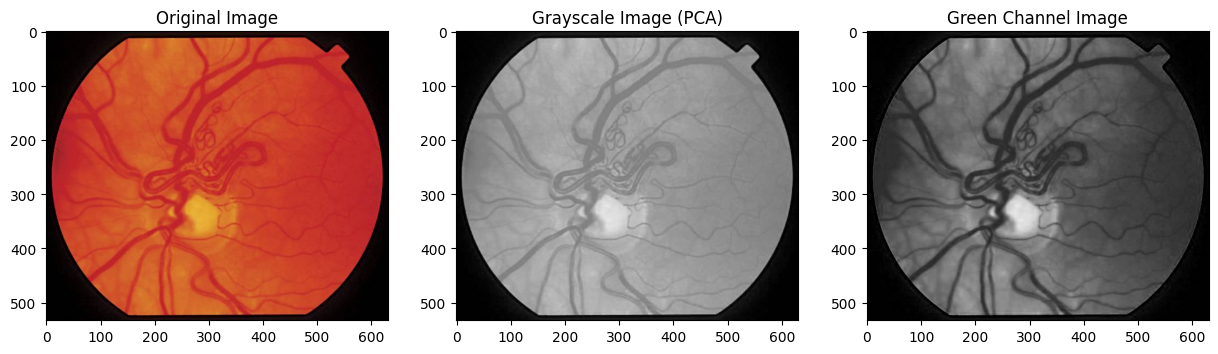

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load an example color fundus image
img = image  # Replace with your image path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original Image')

# Step 1: Stack Color Channels (RGB) as vectors
h, w, c = img.shape
img_reshaped = img.reshape((h * w, c))  # Reshape image into vectors

# Step 2: Convert to YCbCr and subtract mean
img_ycc = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
img_ycc_zero_mean = img_ycc.astype(np.float32)
img_ycc_zero_mean -= np.mean(img_ycc_zero_mean, axis=(0, 1))  # Zero mean

# Step 3: Apply PCA on color image (reshaped to 2D array)
pca = PCA(n_components=3)
pca.fit(img_reshaped)

# Eigenvalues (λ) and Eigenvectors (v)
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Step 4: Project the original image onto the principal components
img_pca = pca.transform(img_reshaped)

# Step 5: Construct grayscale image using weighted combination of PCA components
grayscale_img_pca = np.dot(img_pca, eigenvectors.T[:, 0])  # Weighted by eigenvalues

# Normalize grayscale image to 0-255 range
grayscale_img_pca = grayscale_img_pca - np.min(grayscale_img_pca)
grayscale_img_pca = (grayscale_img_pca / np.max(grayscale_img_pca) * 255).astype(np.uint8)

# Reshape back to the original image dimensions
grayscale_img_pca = grayscale_img_pca.reshape((h, w))

# Display the grayscale image obtained from PCA
plt.subplot(1, 3, 2)
plt.imshow(grayscale_img_pca, cmap='gray')
plt.title('Grayscale Image (PCA)')

# Extract and display the green channel for comparison
green_channel_img = img[:, :, 1]

plt.subplot(1, 3, 3)
plt.imshow(green_channel_img, cmap='gray')
plt.title('Green Channel Image')

plt.show()


MSE Scores:
Basic Grayscale: 4093.9432341330607
Green Channel: 5232.9708504423825
PCA Grayscale: 10126.67480071241
PSNR Scores:
Basic Grayscale: 12.009385443474052
Green Channel: 10.943320453002844
PCA Grayscale: 8.07613497222448


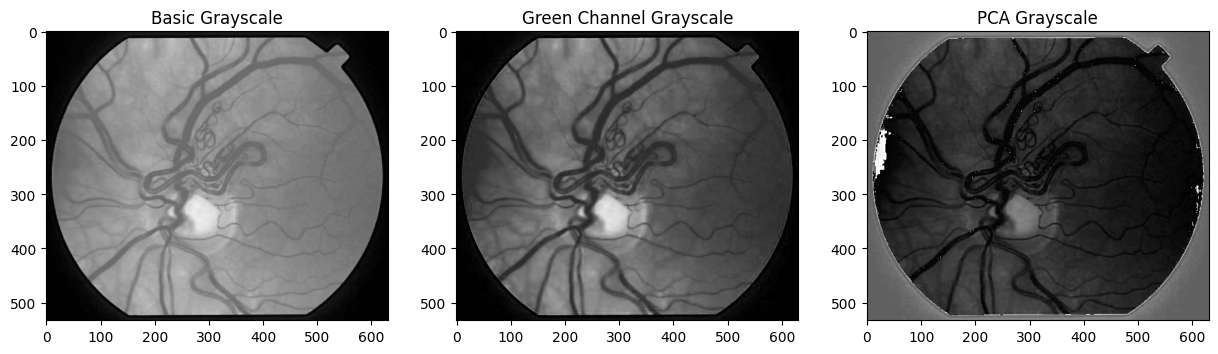

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_float
import math

# Load the image and convert it to RGB
img = image  # Replace with your image path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert original image to basic grayscale using cv2
grayscale_basic = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Extract green channel
green_channel_img = img[:, :, 1]

# Step 1: Stack Color Channels (RGB) as vectors
h, w, c = img.shape
img_reshaped = img.reshape((h * w, c))  # Reshape image into vectors

# Step 2: Apply PCA on color image (reshaped to 2D array)
pca = PCA(n_components=3)
pca.fit(img_reshaped)

# Project the original image onto the principal components
img_pca = pca.transform(img_reshaped)

# Grayscale using PCA's green channel
grayscale_pca = np.dot(img_pca, pca.components_.T[:, 0])
grayscale_pca = grayscale_pca.reshape((h, w)).astype(np.uint8)

# Metric Functions
def calculate_ssim(img1, img2,win_size=4):
    return ssim(img_as_float(img1), img_as_float(img2), multichannel=True)

def calculate_mse(img1, img2):
    return np.mean((img1.astype(np.float64) - img2.astype(np.float64)) ** 2)

def calculate_psnr(img1, img2):
    mse_value = calculate_mse(img1, img2)
    if mse_value == 0:
        return float('inf')
    max_pixel = 255.0
    return 20 * math.log10(max_pixel / math.sqrt(mse_value))

# Reshape grayscale images for comparison
grayscale_basic_3ch = cv2.cvtColor(grayscale_basic, cv2.COLOR_GRAY2RGB)
green_channel_img_3ch = cv2.cvtColor(green_channel_img, cv2.COLOR_GRAY2RGB)
grayscale_pca_3ch = cv2.cvtColor(grayscale_pca, cv2.COLOR_GRAY2RGB)

# SSIM (Comparison with Original Color Image)
#ssim_basic = calculate_ssim(img, grayscale_basic_3ch)
#ssim_green_channel = calculate_ssim(img, green_channel_img_3ch)
#ssim_pca = calculate_ssim(img, grayscale_pca_3ch)

# MSE (Comparison with Original Color Image)
mse_basic = calculate_mse(img, grayscale_basic_3ch)
mse_green_channel = calculate_mse(img, green_channel_img_3ch)
mse_pca = calculate_mse(img, grayscale_pca_3ch)

# PSNR (Comparison with Original Color Image)
psnr_basic = calculate_psnr(img, grayscale_basic_3ch)
psnr_green_channel = calculate_psnr(img, green_channel_img_3ch)
psnr_pca = calculate_psnr(img, grayscale_pca_3ch)

# Display Results
#print(f"SSIM Scores:\nBasic Grayscale: {ssim_basic}\nGreen Channel: {ssim_green_channel}\nPCA Grayscale: {ssim_pca}")
print(f"MSE Scores:\nBasic Grayscale: {mse_basic}\nGreen Channel: {mse_green_channel}\nPCA Grayscale: {mse_pca}")
print(f"PSNR Scores:\nBasic Grayscale: {psnr_basic}\nGreen Channel: {psnr_green_channel}\nPCA Grayscale: {psnr_pca}")

# Display the grayscale images for comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(grayscale_basic, cmap='gray')
plt.title('Basic Grayscale')

plt.subplot(1, 3, 2)
plt.imshow(green_channel_img, cmap='gray')
plt.title('Green Channel Grayscale')

plt.subplot(1, 3, 3)
plt.imshow(grayscale_pca, cmap='gray')
plt.title('PCA Grayscale')

plt.show()


In [11]:

# Homomorphic Filter function
def homomorphic_filter(img, cutoff=30, gamma_low=0.5, gamma_high=1.5):
    # Step 1: Convert image to grayscale
    
    img_gray=img
    # Step 2: Apply log transformation to compress the illumination
    img_log = np.log1p(np.array(img_gray, dtype="float"))
    
    # Step 3: Perform Fourier Transform (spatial to frequency domain)
    dft = np.fft.fft2(img_log)
    dft_shift = np.fft.fftshift(dft)
    
    # Step 4: Create Gaussian high-pass filter
    rows, cols = img_gray.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - crow)**2 + (j - ccol)**2)
            mask[i, j] = 1 - np.exp(- (d ** 2) / (2 * (cutoff ** 2)))

    # Step 5: Apply high-pass filter in the frequency domain
    dft_filtered = dft_shift * mask

    # Step 6: Inverse Fourier Transform to convert back to the spatial domain
    dft_shift_back = np.fft.ifftshift(dft_filtered)
    img_back = np.fft.ifft2(dft_shift_back)
    img_back = np.abs(img_back)

    # Step 7: Apply exponential to reverse the log transform
    img_homomorphic = np.expm1(img_back)

    # Normalize the final image to 0-255 range
    img_homomorphic = cv2.normalize(img_homomorphic, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    return img_homomorphic

In [12]:
homomorphic_img=homomorphic_filter(grayscale_pca)

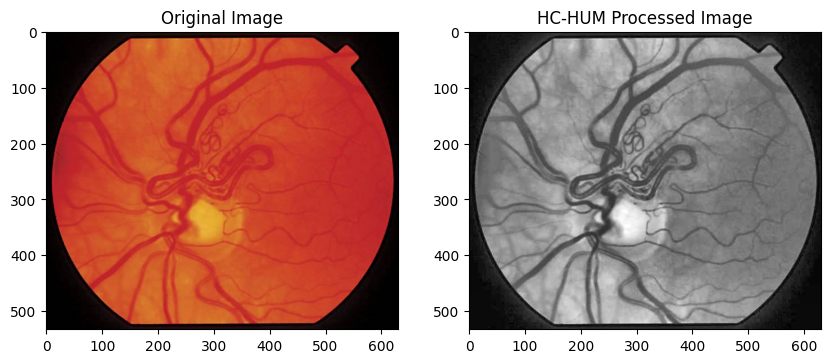

In [13]:
# Hypothetical HC-HUM function
def hc_hum(img, clip_limit=2.0, tile_grid_size=(8, 8), gamma_halo=0.6, gamma_contrast=1.5):
    # Step 1: Convert image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Step 2: Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    img_clahe = clahe.apply(img_gray)

    # Step 3: Apply Non-Linear Mapping for halo suppression (gamma correction)
    # Gamma correction for suppressing halo artifacts
    img_gamma_halo = np.power(img_clahe / 255.0, gamma_halo)
    img_gamma_halo = np.uint8(img_gamma_halo * 255)

    # Step 4: Apply Non-Linear Mapping for contrast enhancement
    img_gamma_contrast = np.power(img_clahe / 255.0, gamma_contrast)
    img_gamma_contrast = np.uint8(img_gamma_contrast * 255)

    # Step 5: Combine the two corrected images
    img_combined = cv2.addWeighted(img_gamma_halo, 0.5, img_gamma_contrast, 0.5, 0)

    return img_combined

# Apply HC-HUM on the input image
hc_hum_img = hc_hum(img)

# Display original and HC-HUM processed image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(hc_hum_img, cmap='gray')
plt.title("HC-HUM Processed Image")

plt.show()


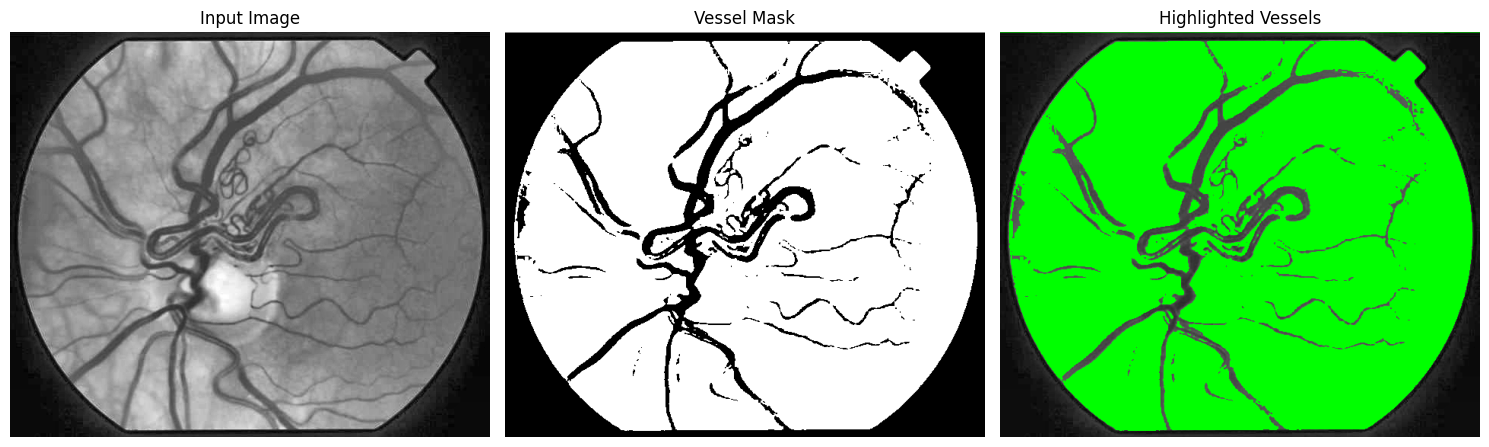

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for matched filtering to detect vessels
def matched_filtering(image, kernel_size=2, angle_steps=1):
    rows, cols = image.shape
    filtered_image = np.zeros_like(image)

    # Create a Gaussian kernel to match the vessels
    sigma = 20
    half_size = kernel_size // 2
    x = np.arange(-half_size, half_size + 1)
    gauss_kernel_1d = np.exp(-(x**2) / (2 * sigma**2))
    gauss_kernel_1d = gauss_kernel_1d / gauss_kernel_1d.sum()
    gauss_kernel = np.outer(gauss_kernel_1d, gauss_kernel_1d)

    # Rotate the Gaussian kernel at multiple angles to match vessels in various directions
    for angle in range(0, 180, int(180 / angle_steps)):
        # Rotate the Gaussian kernel
        M = cv2.getRotationMatrix2D((half_size, half_size), angle, 1)
        rotated_kernel = cv2.warpAffine(gauss_kernel, M, (kernel_size, kernel_size))
        
        # Apply the filter
        filtered_image = np.maximum(filtered_image, cv2.filter2D(image, -1, rotated_kernel))
    
    return filtered_image

# Load a grayscale retinal image (replace with a suitable image)
image = hc_hum_img # Placeholder image for testing

# Apply matched filtering
filtered_image = matched_filtering(image)

# Threshold the filtered image to create a binary mask
_, vessel_mask = cv2.threshold(filtered_image, 40, 255, cv2.THRESH_BINARY)

# Highlight the detected vessels in the original image
highlighted_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
highlighted_image[vessel_mask == 255] = [0, 255, 0]  # Highlight vessels in green

# Display input, output mask, and highlighted part
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Input Image")
axes[0].axis('off')

axes[1].imshow(vessel_mask, cmap='gray')
axes[1].set_title("Vessel Mask")
axes[1].axis('off')

axes[2].imshow(highlighted_image)
axes[2].set_title("Highlighted Vessels")
axes[2].axis('off')

plt.tight_layout()
plt.show()


In [43]:
# Function for applying a triple-stick filter to detect vessels
def triple_stick_filter(image):
    # Define the three stick filters
    filter0 = np.array([[2, 2, 2], [0, 0, 0], [-2, -2, -2]], dtype=np.float32)  # Horizontal
    filter45 = np.array([[0, 2, 2], [-2, 0, 2], [-2, -2, 0]], dtype=np.float32)  # 45 degrees
    filter90 = np.array([[2, 0, -2], [2, 0, -2], [2, 0, -2]], dtype=np.float32)  # Vertical

    # Apply each filter to the image
    response0 = cv2.filter2D(image, -2, filter0)
    response45 = cv2.filter2D(image, -2, filter45)
    response90 = cv2.filter2D(image, -2, filter90)

    # Take the maximum response across all three filters
    max_response = np.maximum(np.maximum(response0, response45), response90)
    
    return max_response


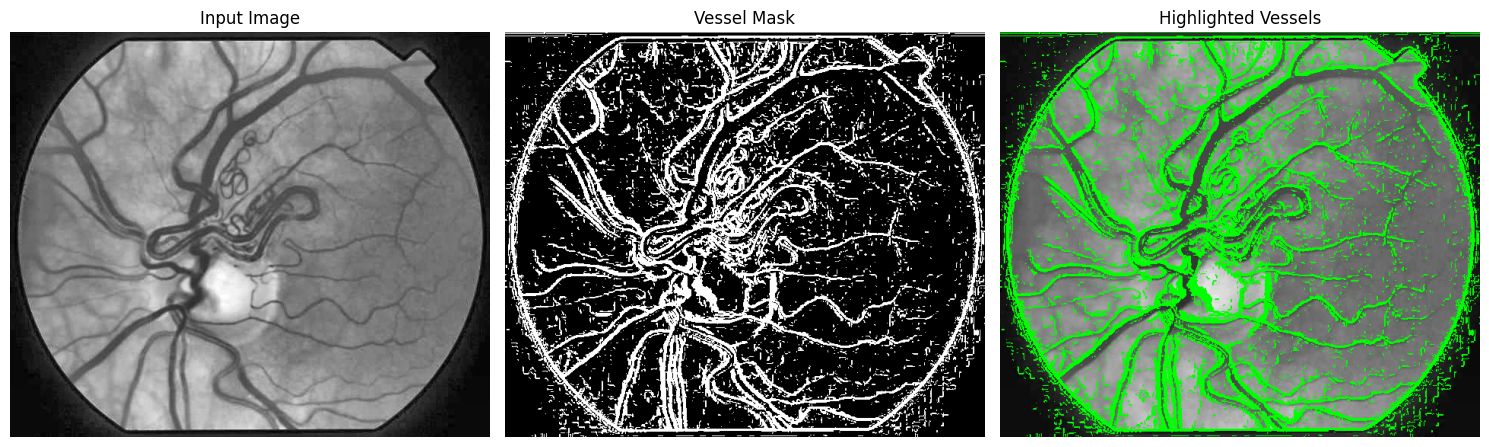

In [44]:
filtered_image = triple_stick_filter(hc_hum_img)

# Threshold the filtered image to create a binary mask
_, vessel_mask = cv2.threshold(filtered_image, 40, 255, cv2.THRESH_BINARY)

# Highlight the detected vessels in the original image
highlighted_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
highlighted_image[vessel_mask == 255] = [0, 255, 0]  # Highlight vessels in green

# Display input, output mask, and highlighted part
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Input Image")
axes[0].axis('off')

axes[1].imshow(vessel_mask, cmap='gray')
axes[1].set_title("Vessel Mask")
axes[1].axis('off')

axes[2].imshow(highlighted_image)
axes[2].set_title("Highlighted Vessels")
axes[2].axis('off')

plt.tight_layout()
plt.show()



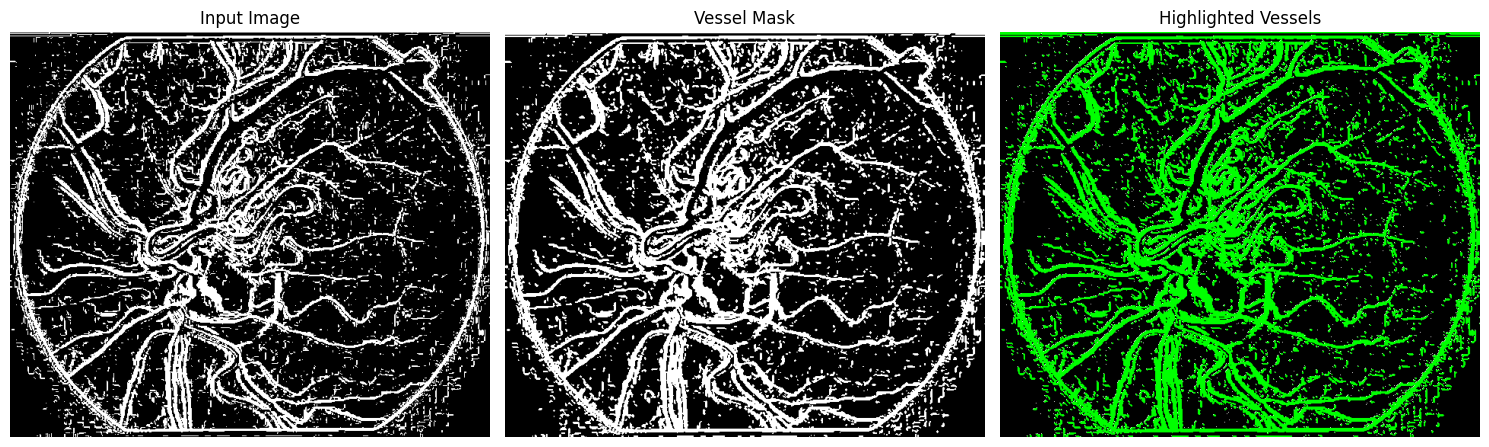

In [45]:
image = vessel_mask # Placeholder image for testing

# Apply matched filtering
filtered_image = matched_filtering(image)

# Threshold the filtered image to create a binary mask
_, vessel_mask = cv2.threshold(filtered_image, 40, 255, cv2.THRESH_BINARY)

# Highlight the detected vessels in the original image
highlighted_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
highlighted_image[vessel_mask == 255] = [0, 255, 0]  # Highlight vessels in green

# Display input, output mask, and highlighted part
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Input Image")
axes[0].axis('off')

axes[1].imshow(vessel_mask, cmap='gray')
axes[1].set_title("Vessel Mask")
axes[1].axis('off')

axes[2].imshow(highlighted_image)
axes[2].set_title("Highlighted Vessels")
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [47]:
import cv2
import numpy as np
from skimage import exposure, morphology, filters, img_as_ubyte
from skimage.morphology import reconstruction, skeletonize
from scipy.ndimage import gaussian_filter

# Load retinal image
image = cv2.imread(r"C:\Users\thooy\Downloads\Evaluation_Set\tileshop.jpeg", cv2.IMREAD_GRAYSCALE)

# Step 1: Preprocessing
# Apply Retinex-like correction (using CLAHE for simplicity)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
image_enhanced = clahe.apply(image)

# Step 2: Vessel Enhancement
# Apply Gaussian filter for smoothing
smooth_img = gaussian_filter(image_enhanced, sigma=1)

# Use Hessian-based vesselness filter for tubular structure enhancement
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

def vesselness_filter(img, sigma=1):
    # First, smooth the image using Gaussian filtering
    img_smoothed = gaussian_filter(img, sigma=sigma)
    
    # Compute the Hessian matrix
    hessian_matrices = hessian_matrix(img_smoothed, sigma=sigma, order='rc')
    
    # Extract eigenvalues
    eigvals = hessian_matrix_eigvals(hessian_matrices)
    
    # Vesselness measure: use the second eigenvalue for vessel enhancement
    vesselness = np.abs(eigvals[1])
    
    return vesselness

vessel_enhanced = vesselness_filter(smooth_img, sigma=1.5)

# Morphological operations for further refinement
# Reconstruction to highlight vessel structures and remove noise
seed = np.copy(vessel_enhanced)
seed[1:-1, 1:-1] = vessel_enhanced.max()
vessel_reconstructed = reconstruction(seed, vessel_enhanced, method='erosion')

# Double thresholding for binary mask
low_threshold = 0.1 * np.max(vessel_reconstructed)
high_threshold = 0.3 * np.max(vessel_reconstructed)
binary_mask = np.where((vessel_reconstructed > low_threshold) & (vessel_reconstructed < high_threshold), 1, 0)

# Step 3: Segmentation
# Adaptive thresholding for vessel segmentation
adaptive_thresh = filters.threshold_otsu(vessel_reconstructed)
vessel_mask = vessel_reconstructed > adaptive_thresh

# Post-processing with morphological operations
# Fill holes to make vessels continuous and connected
vessel_mask_cleaned = morphology.remove_small_objects(vessel_mask, min_size=100)
vessel_mask_cleaned = morphology.binary_closing(vessel_mask_cleaned, morphology.disk(3))
vessel_mask_cleaned = morphology.binary_opening(vessel_mask_cleaned, morphology.disk(1))

# Skeletonize the mask to refine the vessel structure
vessel_skeleton = skeletonize(vessel_mask_cleaned)

# Save the output mask image
output_mask = img_as_ubyte(vessel_skeleton)
cv2.imwrite('vessel_mask.jpg', output_mask)

# Display the results
cv2.imshow('Original Image', image)
cv2.imshow('Enhanced Image', image_enhanced)
cv2.imshow('Vessel Mask', output_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


C:\Users\thooy\AppData\Local\Temp\ipykernel_21900\88671756.py:27: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  hessian_matrices = hessian_matrix(img_smoothed, sigma=sigma, order='rc')
